In [0]:
from fastai import *
from fastai.vision import *
import torch
import torch.nn.functional as F
from torch.utils.data.dataset import TensorDataset
import matplotlib.pyplot as plt
import pickle

In [2]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2019-02-13 07:10:39--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  16.2MB/s    in 0.9s    

2019-02-13 07:10:40 (16.2 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [0]:
!gunzip mnist.pkl.gz

In [4]:
!ls

mnist.pkl  sample_data


In [0]:
with open('mnist.pkl', 'rb') as f:
    ((x_train, y_train), (x_test, y_test), _) = pickle.load(f, encoding='latin-1')

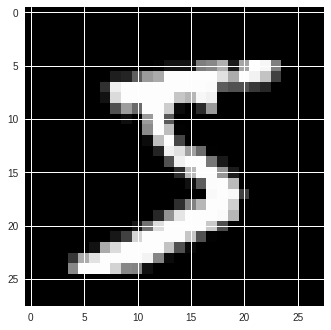

In [10]:
plt.imshow(x_train[0].reshape((28, 28)), cmap='gray')

In [0]:
x_train, y_train, x_test, y_test = map(torch.tensor, (x_train, y_train, x_test, y_test))

In [0]:
n, c = x_train.shape

In [0]:
bs = 64

In [0]:
train_ds = TensorDataset(x_train, y_train)
test_ds = TensorDataset(x_test, y_test)

In [0]:
data = DataBunch.create(train_ds, test_ds, bs=bs)

In [0]:
class MnistNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = torch.nn.Linear(784, 10, bias=True)
    
    def forward(self, xb):
        return self.lin(xb)

In [0]:
model = MnistNet().cuda()

In [23]:
model

MnistNet(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [0]:
lr = 0.1

In [0]:
loss_func = F.cross_entropy

In [0]:
def update(x, y, lr):
    wd = 1e-3
    y_hat = model(x)
    
    w2 = 0.
    for p in model.parameters():
        w2 += (p ** 2).sum()
    
    loss = loss_func(y_hat, y) + w2 * wd
    loss.backward()
    
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    
    return loss.item()

In [0]:
losses = [update(x, y, lr) for x, y in data.train_dl]

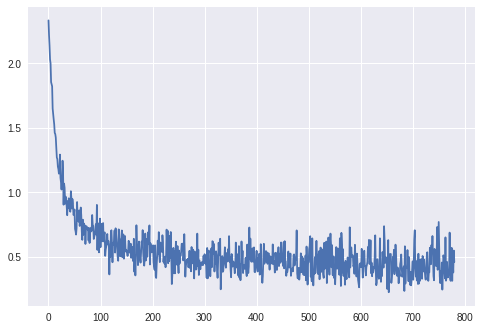

In [31]:
plt.plot(losses)